# Introduction to rose diagrams
Rose diagrams are useful when comparing a large amount of slopes.

For documentation of the different methods available for the custom rose axes see the [SIMPLE documentation](simple.plot.RoseAxes).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import simple

# Generate some random data
rng = np.random.default_rng(seed=46)
n = 10000

x1, y1 = rng.normal(0, 1, n), rng.normal(0, 1, n) # Completely random data
x2, y2 = rng.normal(0, 0.25, n)+1, rng.normal(0, 0.25, n)+2 # random data with a mean slope of 2
x3 = rng.normal(-0.3, 0.6, n); y3 = rng.normal(-2, 0.5, n) * x3

## Plotting slopes
Example where we plot some randomly generated data. 

Notice that the normal distribution of ``Three`` is distorted. This is because the bin width, in regards to the value of the slope, is bigger towards the vertical (``m=infinity``) and smaller towards the horizontal (``m=0``).

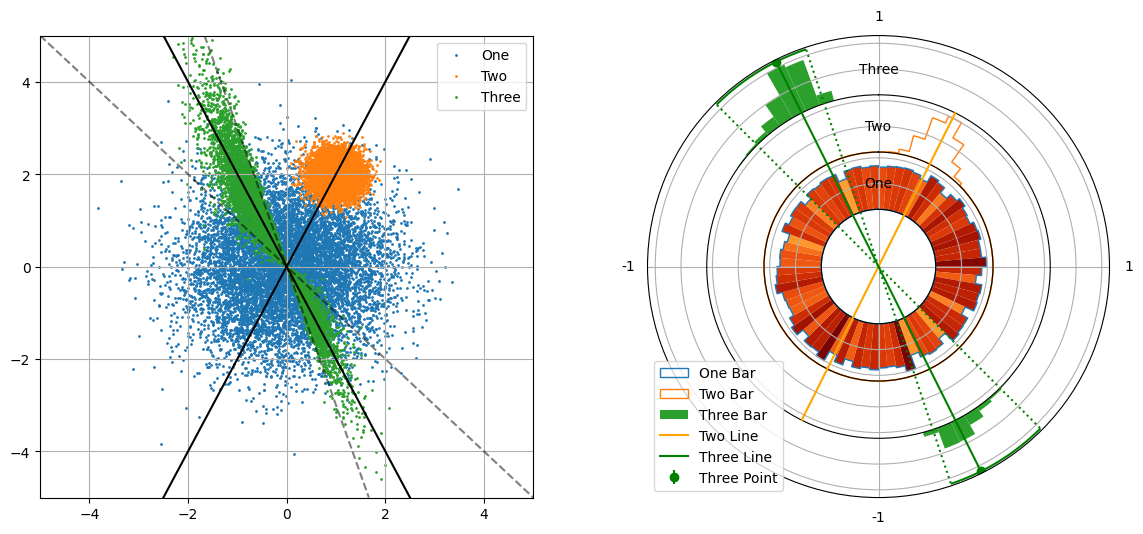

In [2]:
# Creates a figure with 2 rectilinear subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].scatter(x1, y1, s=1, label='One')
ax[0].scatter(x2, y2, s=1, label='Two')
ax[0].scatter(x3, y3, s=1, label='Three')

ax[0].axline((0,0), slope=2, color='black')
ax[0].axline((0,0), slope=-2, color='black')
ax[0].axline((0,0), slope=-3, color='black', linestyle='--', alpha=0.5)
ax[0].axline((0,0), slope=-1, color='black', linestyle='--', alpha=0.5)

ax[0].set(xlim=(-5, 5), ylim=(-5, 5))
ax[0].legend()
ax[0].grid()

# Replaces the second subplot with a rose plot
ax[1] = simple.create_rose_plot(ax[1])

ax[1].mhist((x1, y1), r=1, rtext='One', label='One Bar', cmap=True)
ax[1].mhist((x2, y2), r=2, rtext='Two', label='Two Bar', fill=False)
ax[1].mhist((x3, y3), r=3, rtext='Three', label='Three Bar')

ax[1].mline(2, r=3, color='orange', label='Two Line')
ax[1].axmline(-2, merr=-1, color='green', label='Three Line')
ax[1].merrorbar(-2, r=4, merr=1, color='green', label='Three Point')
ax[1].legend(loc=3);

## Changing the scale
You can change the scale of the rose diagram which may help reduce the distortion. 

Note that this may cause distortion elsewhere like dataset ``One`` here.

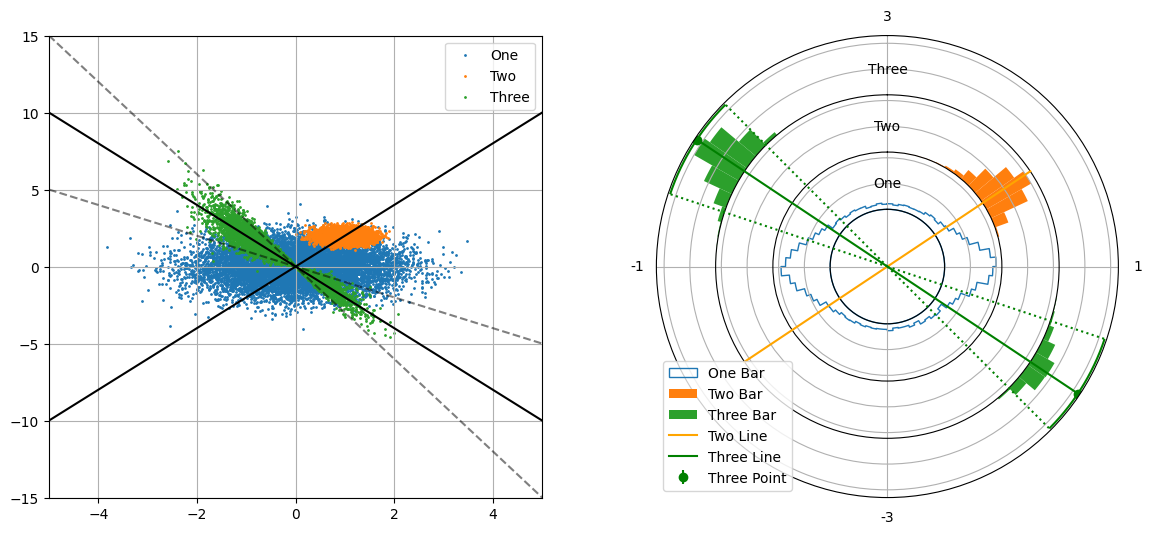

In [3]:
# Create a figure with 2 rectilinear subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].scatter(x1, y1, s=1, label='One')
ax[0].scatter(x2, y2, s=1, label='Two')
ax[0].scatter(x3, y3, s=1, label='Three')

ax[0].axline((0,0), slope=2, color='black')
ax[0].axline((0,0), slope=-2, color='black')
ax[0].axline((0,0), slope=-3, color='black', linestyle='--', alpha=0.5)
ax[0].axline((0,0), slope=-1, color='black', linestyle='--', alpha=0.5)

ax[0].set(xlim=(-5, 5), ylim=(-15, 15))
ax[0].legend()
ax[0].grid()

ax[1] = simple.create_rose_plot(ax[1], yscale=3)

ax[1].mhist((x1, y1), r=1, rtext='One', label='One Bar', fill=False)
ax[1].mhist((x2, y2), r=2, rtext='Two', label='Two Bar')
ax[1].mhist((x3, y3), r=3, rtext='Three', label='Three Bar')

ax[1].mline(2, r=3, color='orange', label='Two Line')
ax[1].axmline(-2, merr=-1, color='green', label='Three Line')
ax[1].merrorbar(-2, r=4, merr=1, color='green', label='Three Point')
ax[1].legend(loc=3);

## Antipodal data
A slope will intersect a circle at two points, the positive and the negative ``x`` coordinates. Here we refer to this type of data as being *antipodal*. 

By default, if ``(x, y)`` is passed then the calculated slope is **not** taken as being antipodal, as seen in the examples above.
However, if the slope ``m`` is passed then the data is assumed to be antipodal as there is no indication of direction. For histograms this means that each slope will be counted twice, once at the positive ``x`` coordinate and once at the negative ``x`` coordinate. 

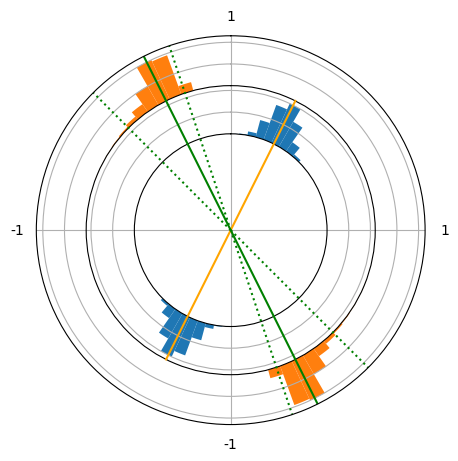

In [4]:
ax = simple.create_rose_plot(figsize=(5, 4.5))
ax.mhist(y2/x2, r=2) # Slopes are antipodal by default
ax.mhist((x3, y3), r=3, antipodal=True) # By default, this data would not be antipodal

ax.mline(2, r=3, color='orange', label='Two')
ax.axmline(-2, merr=-1, color='green')